In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV, cross_validate, RepeatedKFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from matplotlib.pyplot import figure

In [3]:
directory = r'C:\Users\italo\OneDrive\Desktop'
file = 'yoo.csv'
df_2 = pd.read_csv(f'{directory}/{file}')

In [4]:
df_2 = df_2.drop(columns = ['Hand', 'Delay', 'ID']) #we dropped these two variables becauese are useless
#df_2.head()
df_2['ASF'] = df_2['ASF'].apply(lambda x: float(x.split()[0].replace(',', '.'))) #now we see ASF like float64 type
#now we see ASF like float64 type

In [5]:
df_2.head()

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,74,2,3,29,0,1344,0.743,1.306
1,0,55,4,1,29,0,1147,0.810,1.531
2,0,73,4,3,27,1,1454,0.708,1.207
3,1,74,5,2,30,0,1636,0.689,1.073
4,0,52,3,2,30,0,1321,0.827,1.329


## SMOTE

In [6]:
#https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df_2.loc[:, df_2.columns != 'CDR']
y = df_2.loc[:, df_2.columns == 'CDR']

os = SMOTE(random_state=0, k_neighbors=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)

#os_data_X = df_2[['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
#os_data_y= df_2[['CDR']]

os_data_X = pd.DataFrame(data=os_data_X,columns= ['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF'])
os_data_y= pd.DataFrame(data=os_data_y,columns=['CDR']) #CDR because is our target variable

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of Nondementia in oversampled data",len(os_data_y[os_data_y['CDR']==0]))
print("Number of Very Mild Dementia",len(os_data_y[os_data_y['CDR']==3]))
print("Number of Moderate Dementia",len(os_data_y[os_data_y['CDR']==2]))
print("Number of Mild Dementia",len(os_data_y[os_data_y['CDR']==1]))
print("Proportion of Nondementia in oversampled data is ",len(os_data_y[os_data_y['CDR']==0])/len(os_data_X))
print("Proportion of Very Mild Dementia in oversampled data is ",len(os_data_y[os_data_y['CDR']==3])/len(os_data_X))
print("Proportion of Moderate Dementia in oversampled data is ",len(os_data_y[os_data_y['CDR']==2])/len(os_data_X))
print("Proportion of Mild Dementia in oversampled data is ",len(os_data_y[os_data_y['CDR']==1])/len(os_data_X))

length of oversampled data is  364
Number of Nondementia in oversampled data 91
Number of Very Mild Dementia 91
Number of Moderate Dementia 91
Number of Mild Dementia 91
Proportion of Nondementia in oversampled data is  0.25
Proportion of Very Mild Dementia in oversampled data is  0.25
Proportion of Moderate Dementia in oversampled data is  0.25
Proportion of Mild Dementia in oversampled data is  0.25


In [7]:
df_2['CDR'] = df_2['CDR'].apply(lambda x: float(x))

In [8]:
features = list(os_data_X.columns[:])
target = list(os_data_y)
#print(len(features)) #it prints number of features
x = os_data_X.loc[:, features].values #it gives a nested list with values of every features
y = os_data_y.loc[:, 'CDR'].values #it gives a list with values of CDR

In [14]:
y.shape

(364,)

### Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 30)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=30)

## Decision Tree Classifier

In [9]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_features': list(range(1, x_train.shape[1])), 
              'max_depth': [1, 2, 3],
              'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)}

# Create model
tree_class = DecisionTreeClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(tree_class, param_grid, n_jobs=-1, cv=cv)
y_pred = grid_search.fit(x_train, y_train).predict(x_test)

print(grid_search.cv_results_['mean_test_score'])
print(grid_search.best_estimator_)

[0.4325641  0.42282051 0.42579487 0.36774359 0.28907692 0.45712821
 0.43102564 0.46507692 0.37723077 0.32112821 0.45164103 0.44025641
 0.448      0.46261538 0.33010256 0.46364103 0.47005128 0.45461538
 0.47410256 0.3185641  0.47010256 0.478      0.45174359 0.46630769
 0.33010256 0.47015385 0.47671795 0.46497436 0.48594872 0.33523077
 0.46594872 0.47661538 0.48082051 0.49789744 0.34676923 0.54528205
 0.45082051 0.41287179 0.37564103 0.30574359 0.58451282 0.57246154
 0.51251282 0.40328205 0.31215385 0.61553846 0.61307692 0.52210256
 0.42635897 0.31984615 0.63728205 0.64774359 0.53323077 0.44646154
 0.32241026 0.68148718 0.64702564 0.59697436 0.4834359  0.32241026
 0.70676923 0.70292308 0.65097436 0.50969231 0.33779487 0.71912821
 0.69179487 0.67338462 0.49266667 0.34676923 0.5765641  0.50676923
 0.44492308 0.39297436 0.30317949 0.60292308 0.56297436 0.47528205
 0.39405128 0.29933333 0.6365641  0.63923077 0.524      0.44887179
 0.32497436 0.71928205 0.67251282 0.54789744 0.4674359  0.3198

[0.        0.        0.        0.        0.9557828 0.        0.0442172
 0.       ]


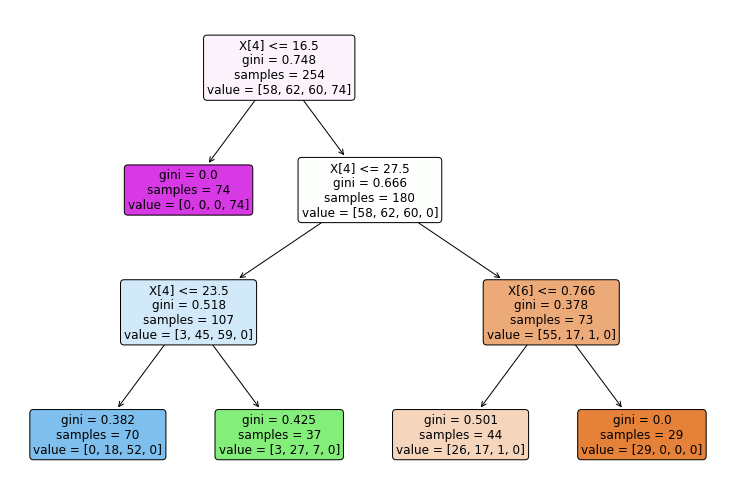

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
tree_class = DecisionTreeClassifier(max_depth=3, max_features=8, min_samples_leaf=0.1)
tree_class.fit(x_train, y_train)
print(tree_class.feature_importances_)
plt.figure(figsize=(13,9))
a = plot_tree(tree_class, filled=True, rounded=True, fontsize=12)

In [11]:
y_train_pred = grid_search.predict(x_train)
y_test_pred = grid_search.predict(x_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE train: 0.193, test: 0.245
R^2 train: 0.849, test: 0.780


### Predicting and accuracy check

In [12]:
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

mae = mean_absolute_error(y_test, y_pred)
print("MAE: %.2f" % mae)

errors = abs(y_pred - y_test)   # Calculate the absolute errors
mape = 100 * (errors / y_test)   # Calculate mean absolute percentage error (MAPE)
print("MAPE: %.2f" % np.mean(mape))
accuracy = 100 - np.mean(mape)   # Calculate and display accuracy
print('Accuracy:', round(accuracy, 2), '%.')

r2 = r2_score(y_test, y_pred)
print("R^2: %.2f" % r2)

MSE: 0.25
RMSE: 0.50
MAE: 0.25
MAPE: nan
Accuracy: nan %.
R^2: 0.78


C:\Users\italo\miniconda3\envs\exams\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
C:\Users\italo\miniconda3\envs\exams\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


### so we try to use starting dataset

[0.62254902 0.65947712 0.65174292 0.62254902 0.62265795 0.64281046
 0.65152505 0.64389978 0.64803922 0.62265795 0.6456427  0.68137255
 0.64793028 0.61002179 0.62265795 0.66328976 0.67124183 0.66732026
 0.63954248 0.62265795 0.6828976  0.69847495 0.69858388 0.65588235
 0.62265795 0.70021786 0.71394336 0.71078431 0.6795207  0.62265795
 0.71982571 0.69880174 0.71002179 0.67222222 0.62265795 0.61535948
 0.61873638 0.61481481 0.61078431 0.62265795 0.6        0.6583878
 0.66546841 0.63627451 0.62265795 0.65163399 0.67156863 0.65969499
 0.63104575 0.62265795 0.69858388 0.68061002 0.68464052 0.65457516
 0.62265795 0.69248366 0.7254902  0.69357298 0.62755991 0.62265795
 0.70816993 0.73943355 0.70642702 0.66819172 0.62265795 0.70664488
 0.7375817  0.71666667 0.68006536 0.62265795 0.62233115 0.61263617
 0.61928105 0.62461874 0.62265795 0.63061002 0.66590414 0.63431373
 0.63877996 0.62265795 0.64771242 0.68039216 0.66960784 0.64052288
 0.62265795 0.67690632 0.70021786 0.68464052 0.6412854  0.62265

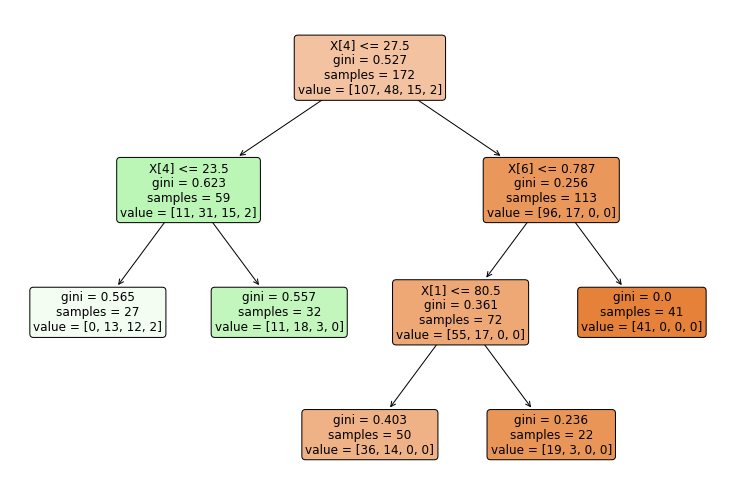

In [13]:
#features = list(df_2.columns['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'])
features_1 = list(df_2.columns[0:5])
features_2 = list(df_2.columns[6:9])
features = features_1 + features_2
#target = list(os_data_y)
#print(len(features)) #it prints number of features
x = df_2.loc[:, features].values #it gives a nested list with values of every features
y = df_2.loc[:, 'CDR'].values #it gives a list with values of CDR

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 30)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=30)

param_grid = {'max_features': list(range(1, x_train.shape[1])), 
              'max_depth': [1, 2, 3],
              'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)}

# Create model
tree_class = DecisionTreeClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(tree_class, param_grid, n_jobs=-1, cv=cv)
y_pred = grid_search.fit(x_train, y_train).predict(x_test)

print(grid_search.cv_results_['mean_test_score'])
print(grid_search.best_estimator_)

tree_class = DecisionTreeClassifier(max_depth=3, max_features=8, min_samples_leaf=0.1)
tree_class.fit(x_train, y_train)
print(tree_class.feature_importances_)
plt.figure(figsize=(13,9))
a = plot_tree(tree_class, filled=True, rounded=True, fontsize=12)

y_train_pred = grid_search.predict(x_train)
y_test_pred = grid_search.predict(x_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

### Predicting and accuracy check

In [14]:
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

mae = mean_absolute_error(y_test, y_pred)
print("MAE: %.2f" % mae)

errors = abs(y_pred - y_test)   # Calculate the absolute errors
mape = 100 * (errors / y_test)   # Calculate mean absolute percentage error (MAPE)
print("MAPE: %.2f" % np.mean(mape))
accuracy = 100 - np.mean(mape)   # Calculate and display accuracy
print('Accuracy:', round(accuracy, 2), '%.')

r2 = r2_score(y_test, y_pred)
print("R^2: %.2f" % r2)

MSE: 0.39
RMSE: 0.62
MAE: 0.34
MAPE: nan
Accuracy: nan %.
R^2: 0.40


C:\Users\italo\miniconda3\envs\exams\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
C:\Users\italo\miniconda3\envs\exams\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


## RFE


In [15]:
### Splitting the dataset into the Training set and Test set

In [16]:
X = df_2.loc[:, df_2.columns != 'CDR']
y = df_2.loc[:, df_2.columns == 'CDR'] #this is target variable

In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import warnings

data_final_vars=df_2.columns.values.tolist()
#print('Our starting variables are: ' + str(data_final_vars).replace('[', '').replace(']', ''), '\n')
print('Variables, except target variable, are: ' + str(X.columns.values.tolist()), '\n')
warnings.filterwarnings("ignore")
#y=['CDR']
#X=['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']

logreg = LogisticRegression(max_iter=100000)
rfe = RFE(logreg, 3) #we selected first four variables
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_) #this is the mask of selected features
print(rfe.ranking_) #The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature
#print(rfe.estimator_)
#print(rfe[rfe.support_])

Variables, except target variable, are: ['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF'] 

[False False False False  True False  True  True]
[2 4 3 5 1 6 1 1]


In [18]:
df_RFE = X[:] #creates a copy of the previous dataframe
df_RFE = df_RFE.drop(columns = ['M/F', 'Age', 'Educ', 'SES', 'eTIV']) #dataframe with features selected with RFE
df_RFE.head()

,MMSE,nWBV,ASF
0,29,0.743,1.306
1,29,0.810,1.531
2,27,0.708,1.207
3,30,0.689,1.073
4,30,0.827,1.329


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_RFE, y, test_size=0.3, random_state = 30)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=30)

## Decision Tree Classifier

In [20]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_features': list(range(1, x_train.shape[1])), 
              'max_depth': [1, 2, 3],
              'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)}

# Create model
tree_class = DecisionTreeClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(tree_class, param_grid, n_jobs=-1, cv=cv)
y_pred = grid_search.fit(x_train, y_train).predict(x_test)

print(grid_search.cv_results_['mean_test_score'])
print(grid_search.best_estimator_)

[0.66430556 0.61361111 0.62222222 0.64430556 0.58236111 0.6625
 0.68861111 0.65361111 0.62458333 0.58902778 0.68638889 0.66194444
 0.65819444 0.61375    0.61569444 0.67541667 0.70430556 0.69777778
 0.62708333 0.59347222 0.64902778 0.66902778 0.64013889 0.64666667
 0.61347222 0.69333333 0.70208333 0.67138889 0.62861111 0.57791667]
DecisionTreeClassifier(max_depth=2, max_features=2, min_samples_leaf=0.2)


[0.85458577 0.14541423 0.        ]


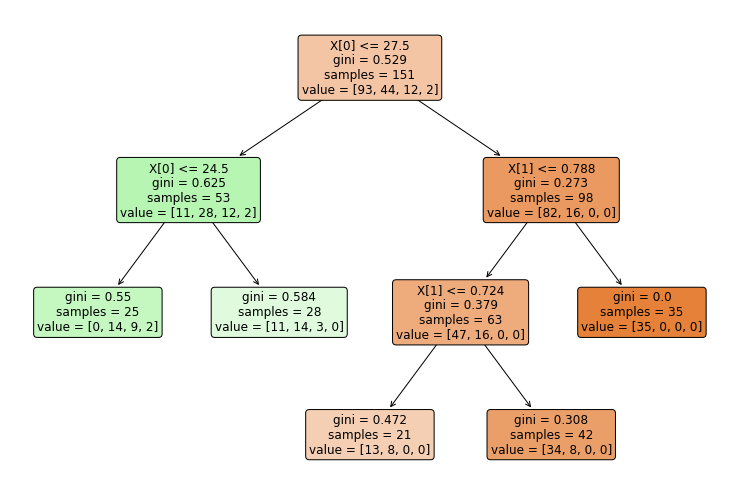

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
tree_class = DecisionTreeClassifier(max_depth=3, max_features=3, min_samples_leaf=0.1)
tree_class.fit(x_train, y_train)
print(tree_class.feature_importances_)
plt.figure(figsize=(13,9))
a = plot_tree(tree_class, filled=True, rounded=True, fontsize=12)

In [22]:
y_train_pred = grid_search.predict(x_train)
y_test_pred = grid_search.predict(x_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE train: 0.311, test: 0.323
R^2 train: 0.363, test: 0.474


### Predicting and accuracy check

In [23]:
y_pred = y_pred.reshape(65,1)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

mae = mean_absolute_error(y_test, y_pred)
print("MAE: %.2f" % mae)

errors = abs(y_pred - y_test)   # Calculate the absolute errors
mape = 100 * (errors / y_test)   # Calculate mean absolute percentage error (MAPE)
print("MAPE: %.2f" % np.mean(mape))
accuracy = 100 - np.mean(mape)   # Calculate and display accuracy
print('Accuracy:', round(accuracy, 2), '%.')

r2 = r2_score(y_test, y_pred)
print("R^2: %.2f" % r2)

MSE: 0.32
RMSE: 0.57
MAE: 0.29
MAPE: inf
Accuracy: CDR   -inf
dtype: float64 %.
R^2: 0.47


### lavoriamo quindi soltanto sul dataset oversampled

## Bagging

In [24]:
from sklearn.ensemble import BaggingClassifier

# Create model
bagging_class = BaggingClassifier(n_estimators=1000, max_samples=30, n_jobs=-1, random_state=30)
bagging_class.fit(x_train, y_train)

BaggingClassifier(max_samples=30, n_estimators=1000, n_jobs=-1, random_state=30)

In [25]:
y_train_pred = bagging_class.predict(x_train)
y_pred = bagging_class.predict(x_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_pred)))

MSE train: 0.212, test: 0.308
R^2 train: 0.566, test: 0.499


### Predicting and accuracy check

In [26]:
y_pred = y_pred.reshape(65, 1)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

mae = mean_absolute_error(y_test, y_pred)
print("MAE: %.2f" % mae)

errors = abs(y_pred - y_test)   # Calculate the absolute errors
mape = 100 * (errors / y_test)   # Calculate mean absolute percentage error (MAPE)
print("MAPE: %.2f" % np.mean(mape))
accuracy = 100 - np.mean(mape)   # Calculate and display accuracy
print('Accuracy:', round(accuracy, 2), '%.')

r2 = r2_score(y_test, y_pred)
print("R^2: %.2f" % r2)

MSE: 0.31
RMSE: 0.55
MAE: 0.28
MAPE: inf
Accuracy: CDR   -inf
dtype: float64 %.
R^2: 0.50


## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [50, 100, 200, 500, 1000],
              'min_samples_split': [2],
              'min_samples_leaf': np.arange(10, 100, 5)}

r_forest = RandomForestClassifier()
grid_search = RandomizedSearchCV(r_forest, param_grid, cv=cv, n_jobs=-1, n_iter=10, random_state=30)
grid_search.fit(x_train, y_train)

print(grid_search.cv_results_['mean_test_score'])
print(grid_search.best_estimator_)

[0.61569444 0.68416667 0.61569444 0.61569444 0.71736111 0.61569444
 0.61569444 0.61569444 0.61569444 0.67972222]
RandomForestClassifier(min_samples_leaf=15, n_estimators=500)


In [28]:
y_train_pred = grid_search.predict(x_train)
y_pred = grid_search.predict(x_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_pred)))

MSE train: 0.291, test: 0.323
R^2 train: 0.403, test: 0.474


### Predicting and accuracy check


In [29]:
y_pred = y_pred.reshape(65, 1)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

mae = mean_absolute_error(y_test, y_pred)
print("MAE: %.2f" % mae)

errors = abs(y_pred - y_test)   # Calculate the absolute errors
mape = 100 * (errors / y_test)   # Calculate mean absolute percentage error (MAPE)
print("MAPE: %.2f" % np.mean(mape))
accuracy = 100 - np.mean(mape)   # Calculate and display accuracy
print('Accuracy:', round(accuracy, 2), '%.')

r2 = r2_score(y_test, y_pred)
print("R^2: %.2f" % r2)

MSE: 0.32
RMSE: 0.57
MAE: 0.29
MAPE: 50.00
Accuracy: CDR    50.0
dtype: float64 %.
R^2: 0.47


## AdaBoost

In [30]:
from sklearn.ensemble import AdaBoostClassifier

param_grid = {'n_estimators': np.arange(50,1000,100),
              'learning_rate': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 1.0],
             } #'loss':['linear', 'square', 'exponential']}

# Create model
ada_class = AdaBoostClassifier()

# Instantiate the grid search model
grid_search = RandomizedSearchCV(ada_class, param_grid, cv=cv, n_jobs=-1, n_iter=20, random_state=30)
grid_search.fit(x_train, y_train)

print(grid_search.cv_results_['mean_test_score'])
print(grid_search.best_estimator_)

[0.38791667 0.54541667 0.55875    0.72444444 0.54097222 0.53444444
 0.53569444 0.56069444 0.72444444 0.55486111 0.72444444 0.58513889
 0.49861111 0.72444444 0.56569444 0.58958333 0.61541667 0.41666667
 0.55625    0.55166667]
AdaBoostClassifier(learning_rate=0.001)


In [31]:
y_train_pred = grid_search.predict(x_train)
y_pred = grid_search.predict(x_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_pred)))

MSE train: 0.311, test: 0.323
R^2 train: 0.363, test: 0.474


### Predicting and accuracy check


In [32]:
y_pred = y_pred.reshape(65, 1)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

mae = mean_absolute_error(y_test, y_pred)
print("MAE: %.2f" % mae)

errors = abs(y_pred - y_test)   # Calculate the absolute errors
mape = 100 * (errors / y_test)   # Calculate mean absolute percentage error (MAPE)
print("MAPE: %.2f" % np.mean(mape))
accuracy = 100 - np.mean(mape)   # Calculate and display accuracy
print('Accuracy:', round(accuracy, 2), '%.')

r2 = r2_score(y_test, y_pred)
print("R^2: %.2f" % r2)

MSE: 0.32
RMSE: 0.57
MAE: 0.29
MAPE: inf
Accuracy: CDR   -inf
dtype: float64 %.
R^2: 0.47


## Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {'max_depth': [1, 2, 3, 4],
     'min_samples_split': [2],
     'min_samples_leaf': np.arange(5,300,5),
     'max_features' : ['log2',1.0],
     'learning_rate' : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 1.0],
     'n_estimators': np.arange(50,1000,50),
      } #'loss' : ['ls','huber']}

# Create model
gb_class = GradientBoostingClassifier()

# Instantiate the grid search model
grid_search = RandomizedSearchCV(gb_class, param_grid, cv=cv, n_jobs=-1, n_iter=20, random_state=30)
grid_search.fit(x_train, y_train)

print(grid_search.cv_results_['mean_test_score'])
print(grid_search.best_estimator_)

[0.61569444 0.61569444 0.61569444 0.61569444 0.61569444 0.61569444
 0.61569444 0.67333333 0.61569444 0.61569444 0.61569444 0.61569444
 0.61569444 0.67486111 0.71958333 0.61569444 0.61569444 0.67305556
 0.68833333 0.61569444]
GradientBoostingClassifier(learning_rate=0.05, max_depth=4, max_features='log2',
                           min_samples_leaf=50, n_estimators=500)


In [34]:
y_train_pred = grid_search.predict(x_train)
y_pred = grid_search.predict(x_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_pred)))

MSE train: 0.212, test: 0.338
R^2 train: 0.566, test: 0.449


### Predicting and accuracy check


In [35]:
y_pred = y_pred.reshape(65, 1)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

mae = mean_absolute_error(y_test, y_pred)
print("MAE: %.2f" % mae)

errors = abs(y_pred - y_test)   # Calculate the absolute errors
mape = 100 * (errors / y_test)   # Calculate mean absolute percentage error (MAPE)
print("MAPE: %.2f" % np.mean(mape))
accuracy = 100 - np.mean(mape)   # Calculate and display accuracy
print('Accuracy:', round(accuracy, 2), '%.')

r2 = r2_score(y_test, y_pred)
print("R^2: %.2f" % r2)

MSE: 0.34
RMSE: 0.58
MAE: 0.31
MAPE: inf
Accuracy: CDR   -inf
dtype: float64 %.
R^2: 0.45


## XGBoost

In [37]:
from xgboost import XGBClassifier

param_grid = {'min_child_weight': np.arange(1,100),
     'learning_rate' : [0.0001, 0.001, 0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.7, 1.0],
     'n_estimators': np.arange(50,3000,50)}

# Create model
xgb_class = XGBClassifier()

# Instantiate the grid search model
grid_search = RandomizedSearchCV(xgb_class, param_grid, cv=cv, n_jobs=-1, n_iter=20, random_state=30)
grid_search.fit(x_train, y_train)

print(grid_search.cv_results_['mean_test_score'])
print(grid_search.best_estimator_)

[0.61569444 0.61569444 0.72388889 0.61569444 0.61569444 0.61569444
 0.61569444 0.61569444 0.61569444 0.61569444 0.61569444 0.61569444
 0.61569444 0.61569444 0.61569444 0.67986111 0.61569444 0.61569444
 0.61569444 0.61569444]
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=23, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [38]:
y_train_pred = grid_search.predict(x_train)
y_pred = grid_search.predict(x_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_pred)))

MSE train: 0.338, test: 0.308
R^2 train: 0.308, test: 0.499


### Predicting and accuracy check

In [39]:
y_pred = y_pred.reshape(65, 1)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

mae = mean_absolute_error(y_test, y_pred)
print("MAE: %.2f" % mae)

errors = abs(y_pred - y_test)   # Calculate the absolute errors
mape = 100 * (errors / y_test)   # Calculate mean absolute percentage error (MAPE)
print("MAPE: %.2f" % np.mean(mape))
accuracy = 100 - np.mean(mape)   # Calculate and display accuracy
print('Accuracy:', round(accuracy, 2), '%.')

r2 = r2_score(y_test, y_pred)
print("R^2: %.2f" % r2)

MSE: 0.31
RMSE: 0.55
MAE: 0.31
MAPE: inf
Accuracy: CDR   -inf
dtype: float64 %.
R^2: 0.50
